# Conflicts time-series dataset released by ACLED

Link to the Conflicts data released by ACLED: https://acleddata.com/data-export-tool/

For more details, see the *README.md*.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
import pandas as pd
import ntpath
import glob
# Set a value for the column width layout.
pd.options.display.max_colwidth = 20
plt.style.use("default")

In [2]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../../packages/")
from MapPlot.MapPlot import draw_adminstratas
from TsIP.TsIP import TsIP

In [3]:
# Define the path where the results arising from this analysis will be saved.
PATH_TO_SAVE_DATA = "./output_timeseries/"

In [4]:
# Read the data released by ACLED regarding the conflicts indicator.
path = "./ACLED_data/"
all_files = glob.glob(path + "*.csv")

dfs = []

for filename in all_files:
    df = pd.read_csv(filename)
    df["Country"] = ntpath.basename(filename).split(".")[0]
    dfs.append(df)

df = pd.concat(dfs, axis = 0, ignore_index = True)
# Delete duplicate rows if exist.
df = df.drop_duplicates()
df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,Country
0,7683085,854,BFO4355,4355,11 February 2021,2021,1,Violence against...,Attack,Unidentified Arm...,...,12.3703,-1.5247,1,Radio Omega,National,On 11 February 2...,0,1613419899,BFA,Burkina Faso
1,7682575,854,BFO4352,4352,10 February 2021,2021,1,Violence against...,Abduction/forced...,Islamic State (G...,...,14.7813,0.0123,1,Facebook; Minute...,Local partner-Other,On 10 February 2...,0,1613419898,BFA,Burkina Faso
2,7682576,854,BFO4353,4353,10 February 2021,2021,1,Battles,Armed clash,Islamic State (G...,...,13.4637,-1.0086,1,Sahel Security A...,New media-National,On 10 February 2...,2,1613419898,BFA,Burkina Faso
3,7682906,854,BFO4354,4354,10 February 2021,2021,1,Strategic develo...,Looting/property...,JNIM: Group for ...,...,13.2319,-0.0012,1,Facebook,New media,Looting: On 10 F...,0,1613419899,BFA,Burkina Faso
4,7682570,854,BFO4347,4347,09 February 2021,2021,1,Battles,Armed clash,Islamic State (G...,...,14.5521,-0.7185,2,Le Pays; Faceboo...,Local partner-Other,On 9 February 20...,3,1613419898,BFA,Burkina Faso


In [5]:
# Check if the dataframe contains some NaN values.
df.isna().sum()

data_id                 0
iso                     0
event_id_cnty           0
event_id_no_cnty        0
event_date              0
year                    0
time_precision          0
event_type              0
sub_event_type          0
actor1                  0
assoc_actor_1       28708
inter1                  0
actor2              13052
assoc_actor_2       28240
inter2                  0
interaction             0
region                  0
country                 0
admin1                  0
admin2                  4
admin3              34852
location                0
latitude                0
longitude               0
geo_precision           0
source                  0
source_scale            0
notes                   0
fatalities              0
timestamp               0
iso3                    0
Country                 0
dtype: int64

In [6]:
# Check index identifier of the dataframe.
df.set_index("data_id").index.is_unique

True

In [7]:
not_unique = df.set_index(["Country", "event_type", "sub_event_type", "event_date", "latitude", "longitude"]).sort_index()
not_unique.index.is_unique

False

In [8]:
not_unique.loc[not_unique.index.value_counts() > 1].head()

data_id  \
Country      event_type sub_event_type event_date     latitude longitude            
Burkina Faso Battles    Armed clash    09 July 2019   14.2296  -0.8654    6132024   
                                                               -0.8654    6131949   
                                       13 June 2020   12.0500   0.7830    7129980   
                                                                0.7830    7127208   
                                       22 August 2018 14.1333  -2.1000    6247116   

                                                                          iso  \
Country      event_type sub_event_type event_date     latitude longitude        
Burkina Faso Battles    Armed clash    09 July 2019   14.2296  -0.8654    854   
                                                               -0.8654    854   
                                       13 June 2020   12.0500   0.7830    854   
                                                                0.7830    854   
                                       22 August 2018 14.1333  -2.1000    854   

                                                                         event_id_cnty  \
Country      event_type sub_event_type event_date     latitude longitude                 
Burkina Faso Battles    Armed clash    09 July 2019   14.2296  -0.8654         BFO1864   
                                                               -0.8654         BFO1863   
                                       13 June 2020   12.0500   0.7830         BFO3816   
                                                                0.7830         BFO3809   
                                       22 August 2018 14.1333  -2.1000         BFO1075   

                                                                          event_id_no_cnty  \
Country      event_type sub_event_type event_date     latitude longitude                     
Burkina Faso Battles    Armed clash    09 July 2019   14.2296  -0.8654                1864   
                                                               -0.8654                1863   
                                       13 June 2020   12.0500   0.7830                3816   
                                                                0.7830                3809   
                                       22 August 2018 14.1333  -2.1000                1075   

                                                                          year  \
Country      event_type sub_event_type event_date     latitude longitude         
Burkina Faso Battles    Armed clash    09 July 2019   14.2296  -0.8654    2019   
                                                               -0.8654    2019   
                                       13 June 2020   12.0500   0.7830    2020   
                                                                0.7830    2020   
                                       22 August 2018 14.1333  -2.1000    2018   

                                                                          time_precision  \
Country      event_type sub_event_type event_date     latitude longitude                   
Burkina Faso Battles    Armed clash    09 July 2019   14.2296  -0.8654                 1   
                                                               -0.8654                 1   
                                       13 June 2020   12.0500   0.7830                 1   
                                                                0.7830                 1   
                                       22 August 2018 14.1333  -2.1000                 1   

                                                                                       actor1  \
Country      event_type sub_event_type event_date     latitude longitude                        
Burkina Faso Battles    Armed clash    09 July 2019   14.2296  -0.8654    JNIM: Group for ...   
                                                               -0.8654    Police Forces of...   
            

In [9]:
# Let's check what are the features (columns) that change for these profiles.
def features_not_unique(x):
    return x.apply(lambda x: x.nunique()/len(x))

# Percentage of change.
not_unique.loc[not_unique.index.value_counts() > 1].groupby(axis = 0, level = [0,1,2,3,4,5], dropna = False).apply(features_not_unique).mean(axis = 0).round(3)

data_id             1.000
iso                 0.486
event_id_cnty       1.000
event_id_no_cnty    1.000
year                0.486
time_precision      0.490
actor1              0.723
assoc_actor_1       0.123
inter1              0.704
actor2              0.401
assoc_actor_2       0.159
inter2              0.708
interaction         0.799
region              0.486
country             0.486
admin1              0.486
admin2              0.486
admin3              0.009
location            0.488
geo_precision       0.704
source              0.851
source_scale        0.548
notes               0.965
fatalities          0.610
timestamp           0.627
iso3                0.486
dtype: float64

### Brief items description

- *data_id*: an individual date numeric	identifier.
- *iso*: a numeric code	for	each individual	country.
- *event_id_cnty*: an individual identifier	by number and country acronym (updated annually).
- *event_id_no_cnty*: an individual	numeric	identifier (updated	annually).
- *event_date*: the	day, month and year	on which an	event took place.
- *year*: the year in which	an event took place.
- *time_precision*: a numeric code indicating the level	of certainty of	the	date coded for the event.
- *event_type*: the	type of	event.
- *sub_event_type*: the	type of	sub-event.
- *actor1*: the	named actor	involved in	the	event.
- *assoc_actor_1*: the named actor associated with or identifying actor1.
- *inter1*: a numeric code indicating the type of actor1.
- *actor2*: the	named actor	involved in	the	event.
- *assoc_actor_2*: the named actor associated with or identifying actor2.
- *inter2*: a numeric code indicating the type of actor2.
- *interaction*: a numeric code	indicating the interaction between types of	actor1 and actor2.
- *region*: the	region of the world	where the event	took place.
- *country*: the country in	which the event	took place.
- *admin1*: the	largest	sub-national administrative	region in which	the	event took place.
- *admin2*: the	second largest sub-national	administrative region in which the event took place.
- *admin3*: the	third largest sub-national administrative region in	which the event	too place.
- *location*: the location in which	the	event took place.
- *latitude*: the latitude of the location.
- *longitude*: the longitude of	the	location.
- *geo_precision*: a numeric code indicating the level of certainty	of the location coded for the event.
- *source*: the	source of the event	report.
- *source scale*: the scale	(local,	regional, national,	international) of the source.
- *notes*: a short description of the event.
- *fatalities*: the	number of reported fatalities which	occurred during	the	event.

ACLED currently	codes six types	of events, both	violent	and	non-violent, that may occur during a conflict. These include:
- *Battles*: violent interactions between two organised armed groups;
- *Explosions/Remote violence*: one-sided violence events in which the tool for	engaging in	conflict creates asymmetry by taking away the ability of the target	to respond;
- *Violence against civilians*: violent	events where an	organised armed	group deliberately inflicts	violence upon unarmed non-combatants;
- *Protests*: a public demonstration against a political entity, government	institution, policy	or group in	which the participants are not violent;
- *Riots*: violent events where	demonstrators or mobs engage in	disruptive acts	or disorganised	acts of	violence against property or people;
- *Strategic development*: accounts	for often non-violent activity by conflict and other agents	within the context of the war/dispute. Recruitment,	looting	and	arrests	are	included.

N.B. ACLED does not independently verify details of fatalities, and includes this information as an estimate only, reflecting the content of media reports.

In [10]:
# Keep only some features/items and raname them.
df = df[["Country", "event_date", "event_type", "sub_event_type", "admin1", "fatalities", "latitude", "longitude"]]
df.rename(columns = {"event_date": "Datetime", "event_type": "Event type", "sub_event_type": "Subevent type", "admin1": "AdminStrata", "fatalities": "Fatalities"}, inplace = True)
df.head()

,Country,Datetime,Event type,Subevent type,AdminStrata,Fatalities,latitude,longitude
0,Burkina Faso,11 February 2021,Violence against...,Attack,Centre,0,12.3703,-1.5247
1,Burkina Faso,10 February 2021,Violence against...,Abduction/forced...,Sahel,0,14.7813,0.0123
2,Burkina Faso,10 February 2021,Battles,Armed clash,Centre-Nord,2,13.4637,-1.0086
3,Burkina Faso,10 February 2021,Strategic develo...,Looting/property...,Est,0,13.2319,-0.0012
4,Burkina Faso,09 February 2021,Battles,Armed clash,Sahel,3,14.5521,-0.7185


### Country item

In [11]:
print("The countries are:", ", ".join(df.Country.unique()))

The countries are: Burkina Faso, Yemen


### AdminStrata item

In [12]:
# Rename the name of some administrative regions of Burkina Faso.
df.loc[df.Country == "Burkina Faso", "AdminStrata"] = df.loc[df.Country == "Burkina Faso", "AdminStrata"].replace(["Boucle du Mouhoun"], 
                                                                                                                  ["Boucle-Du-Mouhoun"])

In [13]:
# Rename the name of some administrative regions of Mali.
df.loc[df.Country == "Yemen", "AdminStrata"] = df.loc[df.Country == "Yemen", "AdminStrata"].replace(["Lahij", "Sanaa", "Sadah", "Hadramawt", "Al Mahrah", "Suqutra", "Ad Dali", "Amanat al Asimah"], 
                                                                                                    ["Lahj", "Sana'a", "Sa'ada", "Hadramaut", "Al Maharah", "Socotra", "Al Dhale'e", "Amanat Al Asimah"])

In [14]:
AdminStratas = df.groupby("Country")["AdminStrata"].unique()

- **Yemen (YEM)**: the administrative regions of Yemen are 22, including the capital Sana'a (Amanat Al Asimah) and Socotra archipelago. The Conflicts dataframe has the values of all the administrative regions.

In [15]:
print(AdminStratas["Yemen"].shape)
AdminStratas["Yemen"]

(22,)


array(['Al Jawf', 'Marib', 'Al Hudaydah', 'Amanat Al Asimah', 'Ibb',
       'Taizz', "Sa'ada", "Al Dhale'e", 'Aden', "Sana'a", 'Al Bayda',
       'Lahj', 'Hajjah', 'Al Mahwit', 'Shabwah', 'Hadramaut', 'Abyan',
       'Dhamar', 'Amran', 'Raymah', 'Al Maharah', 'Socotra'], dtype=object)

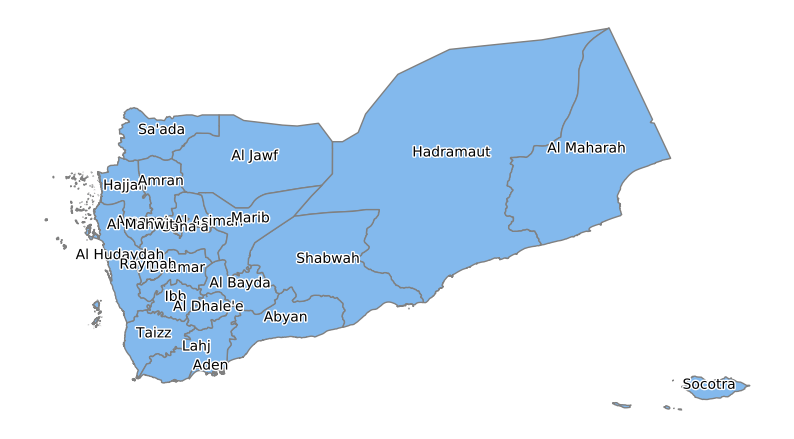

In [16]:
draw_adminstratas("Yemen", AdminStratas["Yemen"], AdminStratas["Yemen"], "../1. Shape Files/output_shapefiles/Yemen/administrative_level_1/Yemen.shp", figsize = (10, 7), 
                  annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Yemen/map_fcs_burkina.png", dpi = 300)

- **Burkina Faso (BFA)**: Burkina Faso is divided into 13 administrative regions. The conflict dataframe has the values of all 13 administrative regions.

In [17]:
print(AdminStratas["Burkina Faso"].shape)
AdminStratas["Burkina Faso"]

(13,)


array(['Centre', 'Sahel', 'Centre-Nord', 'Est', 'Cascades', 'Centre-Sud',
       'Sud-Ouest', 'Hauts-Bassins', 'Nord', 'Boucle-Du-Mouhoun',
       'Centre-Ouest', 'Centre-Est', 'Plateau-Central'], dtype=object)

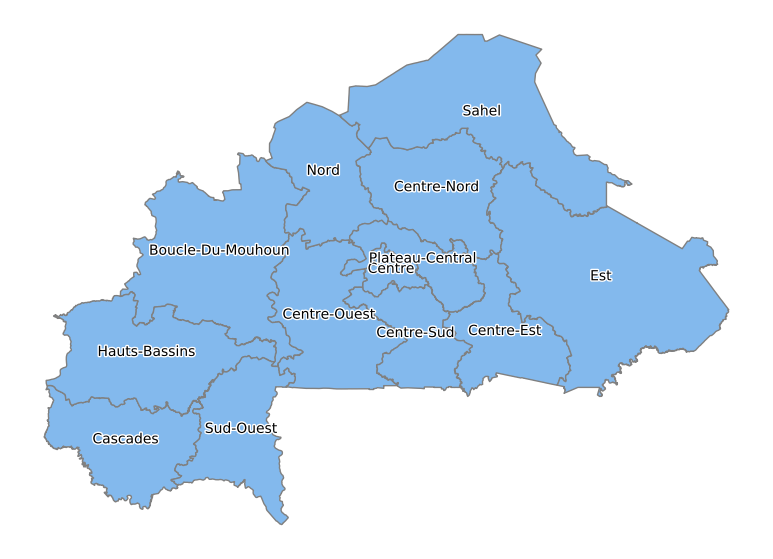

In [18]:
draw_adminstratas("Burkina Faso", AdminStratas["Burkina Faso"], AdminStratas["Burkina Faso"], "../1. Shape Files/output_shapefiles/Burkina Faso/administrative_level_1/Burkina Faso.shp", figsize = (10, 7), 
                  annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Burkina Faso/map_fcs_burkina.png", dpi = 300)

## Creation of the time-series

We decide to focus on the number of fatalities to build our time-series.

In [19]:
# Convert to an appropriate datetime format.
df["Datetime"] = pd.to_datetime(df.Datetime)
df.sort_values("Datetime", ascending = True, inplace = True) 
df.reset_index(drop = True, inplace = True)
df.head()

,Country,Datetime,Event type,Subevent type,AdminStrata,Fatalities,latitude,longitude
0,Yemen,2018-02-13,Explosions/Remot...,Air/drone strike,Al Hudaydah,0,14.0500,43.6167
1,Yemen,2018-02-13,Explosions/Remot...,Shelling/artille...,Taizz,0,12.9431,43.4103
2,Burkina Faso,2018-02-13,Battles,Armed clash,Est,1,11.2497,0.7075
3,Yemen,2018-02-13,Battles,Armed clash,Al Hudaydah,48,14.1325,43.3885
4,Yemen,2018-02-13,Explosions/Remot...,Air/drone strike,Hajjah,0,16.3210,42.8130


In [20]:
# Check if the dataframe contains some NaN values.
df.isnull().sum()

Country          0
Datetime         0
Event type       0
Subevent type    0
AdminStrata      0
Fatalities       0
latitude         0
longitude        0
dtype: int64

In [21]:
# Group the information with multiple information at the same location and datetime keeping median of the fatalities. 
df = df.groupby(["Country", "AdminStrata", "Event type", "Subevent type", "Datetime", "latitude", "longitude"]).median().reset_index()
df.drop(["latitude", "longitude"], axis = 1, inplace = True)

In [22]:
# Create appropriate time-series subgroups with an appropriate datetime object resampled to day keeping sum fatalities if occurred in the same day of the same administrative region and subevent. 
df = df.groupby(["Country", "AdminStrata", "Event type", "Subevent type"]).apply(lambda group: group.set_index("Datetime").resample("D").sum()).reset_index()
df.reset_index(drop = True, inplace = True)
df.head()

,Country,AdminStrata,Event type,Subevent type,Datetime,Fatalities
0,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-03-17,1.0
1,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-03-18,0.0
2,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-03-19,0.0
3,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-03-20,0.0
4,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2018-03-21,0.0


In [23]:
# Create a dataframe with multi-index column in order to have a summary dataframe of the time-series.
df = df.set_index(["Datetime", "Country", "AdminStrata", "Event type", "Subevent type"]).unstack(["Country", "AdminStrata", "Event type", "Subevent type"])
df.columns = df.columns.droplevel(0)
freq = "D"
df.index.freq = freq
df.head()

Country            Burkina Faso                                \
AdminStrata   Boucle-Du-Mouhoun                                 
Event type              Battles    Explosions/Remote violence   
Subevent type       Armed clash Remote explosive/landmine/IED   
Datetime                                                        
2018-02-13                  NaN                  NaN            
2018-02-14                  NaN                  NaN            
2018-02-15                  NaN                  NaN            
2018-02-16                  NaN                  NaN            
2018-02-17                  NaN                  NaN            

Country                                                            \
AdminStrata                                                         
Event type            Protests        Riots                         
Subevent type Peaceful protest Mob violence Violent demonstration   
Datetime                                                            
2018-02-13                 NaN          NaN                  NaN    
2018-02-14                 NaN          NaN                  NaN    
2018-02-15                 NaN          NaN                  NaN    
2018-02-16                 NaN          NaN                  NaN    
2018-02-17                 NaN          NaN                  NaN    

Country                                                            \
AdminStrata                                                         
Event type    Strategic developments                                
Subevent type  Disrupted weapons use Looting/property destruction   
Datetime                                                            
2018-02-13                     NaN                    NaN           
2018-02-14                     NaN                    NaN           
2018-02-15                     NaN                    NaN           
2018-02-16                     NaN                    NaN           
2018-02-17                     NaN                    NaN           

Country                                                              ...  \
AdminStrata                                                          ...   
Event type        Violence against civilians                         ...   
Subevent type Abduction/forced disappearance Attack Sexual violence  ...   
Datetime                                                             ...   
2018-02-13                     NaN              NaN             NaN  ...   
2018-02-14                     NaN              NaN             NaN  ...   
2018-02-15                     NaN              NaN             NaN  ...   
2018-02-16                     NaN              NaN             NaN  ...   
2018-02-17                     NaN              NaN             NaN  ...   

Country                        Yemen                           \
AdminStrata                    Taizz                            
Event type    Strategic developments                            
Subevent type                Arrests Change to group/activity   
Datetime                                                        
2018-02-13                     NaN                    NaN       
2018-02-14                     NaN                    NaN       
2018-02-15                     NaN                    NaN       
2018-02-16                     NaN                    NaN       
2018-02-17                     NaN                    NaN       

Country                                                               \
AdminStrata                                                            
Event type                                                             
Subevent type Disrupted weapons use Headquarters or base established   
Datetime                                                               
2018-02-13                     NaN                   NaN               
2018-02-14                     NaN                   NaN               
2018-02-15                     NaN                 

N.B. We decide to fill the NaN values of the fatalities with the value 0 (0 fatalities ascertained by ACLED).

In [24]:
df.fillna(value = 0, inplace = True)
df.head()

Country            Burkina Faso                                \
AdminStrata   Boucle-Du-Mouhoun                                 
Event type              Battles    Explosions/Remote violence   
Subevent type       Armed clash Remote explosive/landmine/IED   
Datetime                                                        
2018-02-13                  0.0                  0.0            
2018-02-14                  0.0                  0.0            
2018-02-15                  0.0                  0.0            
2018-02-16                  0.0                  0.0            
2018-02-17                  0.0                  0.0            

Country                                                            \
AdminStrata                                                         
Event type            Protests        Riots                         
Subevent type Peaceful protest Mob violence Violent demonstration   
Datetime                                                            
2018-02-13                 0.0          0.0                  0.0    
2018-02-14                 0.0          0.0                  0.0    
2018-02-15                 0.0          0.0                  0.0    
2018-02-16                 0.0          0.0                  0.0    
2018-02-17                 0.0          0.0                  0.0    

Country                                                            \
AdminStrata                                                         
Event type    Strategic developments                                
Subevent type  Disrupted weapons use Looting/property destruction   
Datetime                                                            
2018-02-13                     0.0                    0.0           
2018-02-14                     0.0                    0.0           
2018-02-15                     0.0                    0.0           
2018-02-16                     0.0                    0.0           
2018-02-17                     0.0                    0.0           

Country                                                              ...  \
AdminStrata                                                          ...   
Event type        Violence against civilians                         ...   
Subevent type Abduction/forced disappearance Attack Sexual violence  ...   
Datetime                                                             ...   
2018-02-13                     0.0              0.0             0.0  ...   
2018-02-14                     0.0              0.0             0.0  ...   
2018-02-15                     0.0              0.0             0.0  ...   
2018-02-16                     0.0              0.0             0.0  ...   
2018-02-17                     0.0              0.0             0.0  ...   

Country                        Yemen                           \
AdminStrata                    Taizz                            
Event type    Strategic developments                            
Subevent type                Arrests Change to group/activity   
Datetime                                                        
2018-02-13                     0.0                    0.0       
2018-02-14                     0.0                    0.0       
2018-02-15                     0.0                    0.0       
2018-02-16                     0.0                    0.0       
2018-02-17                     0.0                    0.0       

Country                                                               \
AdminStrata                                                            
Event type                                                             
Subevent type Disrupted weapons use Headquarters or base established   
Datetime                                                               
2018-02-13                     0.0                   0.0               
2018-02-14                     0.0                   0.0               
2018-02-15                     0.0                 

In [25]:
# Plot time-series.
TsIP(df).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Fatalities", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [26]:
# Now save the time-series of each country keeping as indeces for each time-series the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time-series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(PATH_TO_SAVE_DATA + country + "/" + name + ".csv", index_label = False)

In [27]:
# Save time-series.
df.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_conflicts"));

Reduce the Event taking only the 'Event type' summing the corresponding 'Subevent type'.

In [28]:
# Reduce the Event tanking only the 'Event type' summing the corresponding 'Subevent type'.
df_event = df.groupby(level = [0, 1, 2], axis = 1).sum()
df_event.head()

Country          Burkina Faso                                            \
AdminStrata Boucle-Du-Mouhoun                                             
Event type            Battles Explosions/Remote violence Protests Riots   
Datetime                                                                  
2018-02-13                0.0                  0.0            0.0   0.0   
2018-02-14                0.0                  0.0            0.0   0.0   
2018-02-15                0.0                  0.0            0.0   0.0   
2018-02-16                0.0                  0.0            0.0   0.0   
2018-02-17                0.0                  0.0            0.0   0.0   

Country                                                                 \
AdminStrata                                                   Cascades   
Event type  Strategic developments Violence against civilians  Battles   
Datetime                                                                 
2018-02-13                   0.0                    0.0            0.0   
2018-02-14                   0.0                    0.0            0.0   
2018-02-15                   0.0                    0.0            0.0   
2018-02-16                   0.0                    0.0            0.0   
2018-02-17                   0.0                    0.0            0.0   

Country                                                ...    Yemen        \
AdminStrata                                            ...  Socotra         
Event type  Explosions/Remote violence Protests Riots  ... Protests Riots   
Datetime                                               ...                  
2018-02-13                   0.0            0.0   0.0  ...      0.0   0.0   
2018-02-14                   0.0            0.0   0.0  ...      0.0   0.0   
2018-02-15                   0.0            0.0   0.0  ...      0.0   0.0   
2018-02-16                   0.0            0.0   0.0  ...      0.0   0.0   
2018-02-17                   0.0            0.0   0.0  ...      0.0   0.0   

Country                                                                \
AdminStrata                                                     Taizz   
Event type  Strategic developments Violence against civilians Battles   
Datetime                                                                
2018-02-13                   0.0                    0.0          10.0   
2018-02-14                   0.0                    0.0          22.0   
2018-02-15                   0.0                    0.0           0.0   
2018-02-16                   0.0                    0.0          20.0   
2018-02-17                   0.0                    0.0           0.0   

Country                                                                       \
AdminStrata                                                                    
Event type  Explosions/Remote violence Protests Riots Strategic developments   
Datetime                                                                       
2018-02-13                   0.0            0.0   0.0                  0.0     
2018-02-14                  16.0            0.0   0.0                  0.0     
2018-02-15                   0.0            0.0   0.0                  0.0     
2018-02-16                  12.0            0.0   0.0                  0.0     
2018-02-17                   0.0            0.0   0.0                  0.0     

Country                                 
AdminStrata                             
Event type  Violence against civilians  
Datetime                                
2018-02-13                   0.0        
2018-02-14                   1.0        
2018-02-15                   0.0        
2018-02-16                   0.0        
2018-02-17                   0.0        

[5 rows x 197 columns]

In [29]:
# Plot time-series.
TsIP(df_event).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Fatalities", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [30]:
# Save time-series.
df_event.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_conflicts_event"));

## Unique conflict indicator

We decide to create a unique indicator for the fatalities summing over all 'Event' types for each administrative region.

In [31]:
# I decide to create a unique indicator for the fatalities for each adminstrata.
def sum_event_fatalities(group):
    group = group.sum(axis = 1)
    return group

df_sum_event = df_event.groupby(level = [0, 1], axis = 1).apply(sum_event_fatalities)
df_sum_event.columns = pd.MultiIndex.from_tuples(list(map(lambda x: tuple([x[0], x[1], "Fatalities"]), df_sum_event.columns)), names = ["Country", "AdminStrata", "Indicator"])
df_sum_event.head()

Country          Burkina Faso                                               \
AdminStrata Boucle-Du-Mouhoun   Cascades     Centre Centre-Est Centre-Nord   
Indicator          Fatalities Fatalities Fatalities Fatalities  Fatalities   
Datetime                                                                     
2018-02-13                0.0        0.0        0.0        0.0         0.0   
2018-02-14                0.0        0.0        0.0        0.0         0.0   
2018-02-15                0.0        0.0        0.0        0.0         0.0   
2018-02-16                0.0        0.0        0.0        0.0         0.0   
2018-02-17                0.0        0.0        0.0        0.0         0.0   

Country                                                                  ...  \
AdminStrata Centre-Ouest Centre-Sud        Est Hauts-Bassins       Nord  ...   
Indicator     Fatalities Fatalities Fatalities    Fatalities Fatalities  ...   
Datetime                                                                 ...   
2018-02-13           0.0        0.0        1.0           0.0        0.0  ...   
2018-02-14           0.0        0.0        0.0           0.0        0.0  ...   
2018-02-15           0.0        0.0        0.0           0.0        0.0  ...   
2018-02-16           0.0        0.0        0.0           0.0        0.0  ...   
2018-02-17           0.0        0.0        0.0           0.0        0.0  ...   

Country          Yemen                                                         \
AdminStrata     Hajjah        Ibb       Lahj      Marib     Raymah     Sa'ada   
Indicator   Fatalities Fatalities Fatalities Fatalities Fatalities Fatalities   
Datetime                                                                        
2018-02-13         0.0        0.0        0.0        0.0        0.0        0.0   
2018-02-14        55.0        0.0       13.0       14.0        0.0       13.0   
2018-02-15         0.0        0.0        0.0        2.0        0.0        0.5   
2018-02-16         0.0        0.0       16.0       12.0        0.0        2.0   
2018-02-17        41.0        5.0        0.0        8.0        0.0       19.0   

Country                                                  
AdminStrata     Sana'a    Shabwah    Socotra      Taizz  
Indicator   Fatalities Fatalities Fatalities Fatalities  
Datetime                                                 
2018-02-13        20.0        0.0        0.0       10.0  
2018-02-14         0.0        0.0        0.0       39.0  
2018-02-15         0.0        0.0        0.0        0.0  
2018-02-16         6.0        0.0        0.0       32.0  
2018-02-17         0.0        0.0        0.0        0.0  

[5 rows x 35 columns]

In [32]:
# Plot time-series.
TsIP(df_sum_event).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Fatalities", first_last_valid_index_group = True)

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Yemen'), value='Burkina F…

In [33]:
# Save time-series.
df_sum_event.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_conflicts_sum_event"));

## Adjustment of the conflicts time-series to the time coverage of the FCG <= 2 analysis

Now, we manage the current data keeping only the administrative regions present in the FCG <= 2 analysis. Furthermore, we aggregate data following the FCG <= 2 data collection: the FCG <= 2 value of a certain province corresponding to a referece date does not correspond to the percentage of poor and borderline people on that day, but in a greater time range. 

In [34]:
def SvyDate_agg(group):
    country = group.name[0]
    adminstrata = group.name[1]
    indicator = group.name[2]
    group = group.loc[group.first_valid_index():group.last_valid_index()]
    # Load the information regarding the FCG <= 2 survey.
    fcs_coverage = pd.read_csv("../2. Food Consumption Score (FCS)/output_timeseries/%s/wfp_fcs-SvyDateRange.csv" % country, header = [0, 1], index_col = 0)
    fcs_coverage.index = pd.to_datetime(fcs_coverage.index)
    # Ignore the adminstrata not considered in the FCG <= 2 survey.
    if adminstrata in fcs_coverage.columns.get_level_values(0).unique():
        fcs_coverage_adminstrata = fcs_coverage[adminstrata].loc[fcs_coverage[adminstrata].first_valid_index():fcs_coverage[adminstrata].last_valid_index()]
        # Sliding window according to the coverage of the FCG <= 2 analysis..
        start_svy = fcs_coverage_adminstrata.index[0]
        end_svy = fcs_coverage_adminstrata.index[-1]
        new_group = group.loc[start_svy:end_svy].copy()
        for index in new_group.index:
            look_back = int(fcs_coverage_adminstrata.loc[index].values[0])
            # Window over the column.
            new_group.loc[index] = group.loc[index-(look_back-1)*group.index.freq:index].sum() 
        return new_group
    else:
        pass
    
df_sum_event_SvyWindow = df_sum_event.groupby(level = [0, 1, 2], axis = 1, group_keys = False).apply(SvyDate_agg)
df_sum_event_SvyWindow.head()

Country          Burkina Faso                                               \
AdminStrata Boucle-Du-Mouhoun   Cascades     Centre Centre-Est Centre-Nord   
Indicator          Fatalities Fatalities Fatalities Fatalities  Fatalities   
Datetime                                                                     
2018-07-02                NaN        NaN        NaN        NaN         NaN   
2018-07-03                NaN        NaN        NaN        NaN         NaN   
2018-07-04                NaN        NaN        NaN        NaN         NaN   
2018-07-05                NaN        NaN        NaN        NaN         NaN   
2018-07-06                NaN        NaN        NaN        NaN         NaN   

Country                                                                  ...  \
AdminStrata Centre-Ouest Centre-Sud        Est Hauts-Bassins       Nord  ...   
Indicator     Fatalities Fatalities Fatalities    Fatalities Fatalities  ...   
Datetime                                                                 ...   
2018-07-02           NaN        NaN        NaN           NaN        NaN  ...   
2018-07-03           NaN        NaN        NaN           NaN        NaN  ...   
2018-07-04           NaN        NaN        NaN           NaN        NaN  ...   
2018-07-05           NaN        NaN        NaN           NaN        NaN  ...   
2018-07-06           NaN        NaN        NaN           NaN        NaN  ...   

Country          Yemen                                                         \
AdminStrata     Hajjah        Ibb       Lahj      Marib     Raymah     Sa'ada   
Indicator   Fatalities Fatalities Fatalities Fatalities Fatalities Fatalities   
Datetime                                                                        
2018-07-02       136.0        3.0       99.0       97.0        0.0      578.0   
2018-07-03       124.0        3.0      105.0       97.0        0.0      581.0   
2018-07-04       124.0       11.0      105.0       97.0        0.0      542.0   
2018-07-05       123.0       11.0      111.0       97.0        0.0      546.0   
2018-07-06       113.0       11.0      121.0       97.0        0.0      546.0   

Country                                                  
AdminStrata     Sana'a    Shabwah    Socotra      Taizz  
Indicator   Fatalities Fatalities Fatalities Fatalities  
Datetime                                                 
2018-07-02       155.0        7.0        0.0      400.5  
2018-07-03       160.0        7.0        0.0      403.5  
2018-07-04       166.0       12.0        0.0      393.5  
2018-07-05       176.0       12.0        0.0      385.5  
2018-07-06       186.0       19.0        0.0      385.5  

[5 rows x 35 columns]

In [35]:
# Plot time-series.
TsIP(df_sum_event_SvyWindow).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Fatalities", first_last_valid_index_group = True)

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Yemen'), value='Burkina F…

In [36]:
# Save time-series.
df_sum_event_SvyWindow.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_conflicts_sum_event_SvyWindow"));

In [37]:
def full_extent(ax, pad = 0.0):
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels() 
    items += [ax, ax.title, ax.xaxis.label, ax.yaxis.label]
    bbox = Bbox.union([item.get_window_extent() for item in items])
    return bbox.expanded(1.0 + pad, 1.0 + pad)

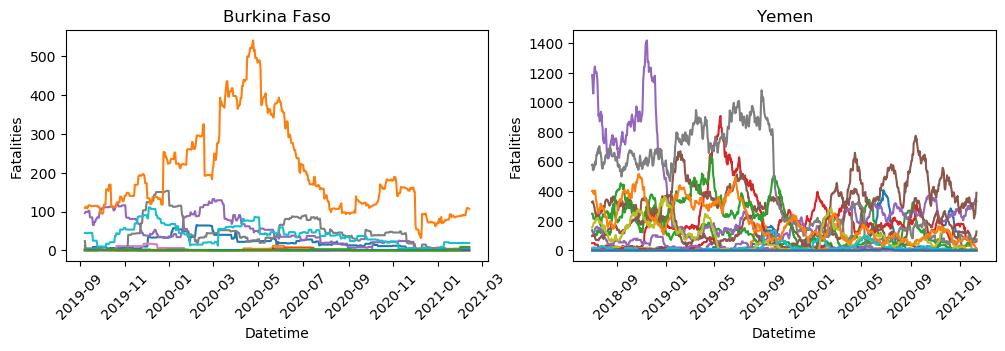

In [38]:
# Plot the original time-series of the fatalities indicator for each country.
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 3))
fig.subplots_adjust(hspace = 0.5)
axs = axs.ravel()
for i, country in enumerate(df_sum_event_SvyWindow.columns.get_level_values(0).unique()):
    axs[i].plot(df_sum_event_SvyWindow[country])
    axs[i].set_title(country)
    axs[i].set_xlabel("Datetime")
    axs[i].set_ylabel("Fatalities")
    axs[i].tick_params(axis = "x", labelrotation = 45)
    # Save just the portion of the current axes.
    extent = full_extent(axs[i]).transformed(fig.dpi_scale_trans.inverted())
    extent = axs[i].get_tightbbox(fig.canvas.renderer).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(PATH_TO_SAVE_DATA + "%s/ts_conflict_%s.png" % (country, country), bbox_inches = extent, dpi = 300)
# Remove extra plot.
#axs[-1].set_axis_off()

In [39]:
# Save the figure.
fig.savefig(PATH_TO_SAVE_DATA + "ts.png", dpi = 300)